In [156]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import legend
import statsmodels
from  statsmodels import stats
from  statsmodels.stats import weightstats as saw
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f



In [5]:
df = pd.read_csv('/content/sample_data/hotel_bookings.csv')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.shape

(119390, 32)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [12]:
df = df.drop(['company','agent'],axis=1)


In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
(16340/119390)*100

13.686238378423655

In [15]:
(488/119390)*100

0.40874445095904177

In [16]:
df.country.mode()

,country
0,PRT


In [17]:
df.fillna('PRT',inplace=True)

<ipython-input-17-4fbe581194b8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PRT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('PRT',inplace=True)


In [18]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [19]:
df[df.duplicated]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
df.duplicated().sum()


np.int64(32039)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(87351, 30)

In [24]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


In [25]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [26]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'] + '-' +
                                     df['arrival_date_day_of_month'].astype(str),
                                     format='%Y-%B-%d')

In [27]:
df['arrival_date'].head()

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01


In [28]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01


In [29]:
cols= list(df.columns)
last = cols.pop()
cols.insert(3, last)
df = df[cols]

In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [32]:
df.adr.mean()

np.float64(106.35102437293219)

In [33]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [34]:
#indices of outliers
a = df[~((df['adr'] >= lower) & (df['adr'] <= upper))].index
a

Index([   396,    523,    526,    584,    641,    683,    695,    780,    799,
          803,
       ...
       119070, 119126, 119140, 119144, 119151, 119152, 119247, 119289, 119339,
       119365],
      dtype='int64', length=2488)

In [35]:
df.adr.mean()

np.float64(106.35102437293219)

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [37]:
df.shape

(87351, 32)

In [38]:
df = df[(df['adr'] >= lower) & (df['adr'] <= upper)]

In [39]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [40]:
df.adr.mean()

np.float64(101.79312044118167)

In [41]:
#Difference between the 2 means
 #106.35102437293219 - 101.79312044118167



In [42]:
df[df['adults']==0].index

Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,  32029,
        32827,
       ...
       116558, 116832, 117087, 117128, 117130, 117204, 117274, 117303, 117453,
       118200],
      dtype='int64', length=385)

In [43]:
#total count where adult = 0
len(df[df['adults']==0].index)

385

In [44]:
df = df[df['adults']>0]

In [45]:
df.shape

(84478, 32)

In [46]:
len(df[df['adults']==0].index)

0

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [48]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay'],
      dtype='object')

In [49]:
#moving total_stay col
cols= list(df.columns)
last = cols.pop()
cols.insert(10, last)
df = df[cols]

In [50]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [51]:
df.hotel.value_counts()

,count
hotel,
City Hotel,52264
Resort Hotel,32214


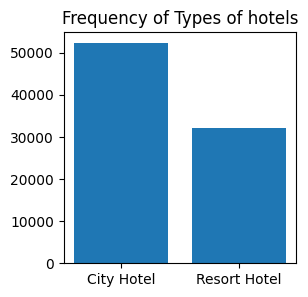

In [52]:
plt.figure(figsize = (3, 3))
plt.title('Frequency of Types of hotels')
plt.bar(df.hotel.value_counts().index,df.hotel.value_counts())
plt.show()

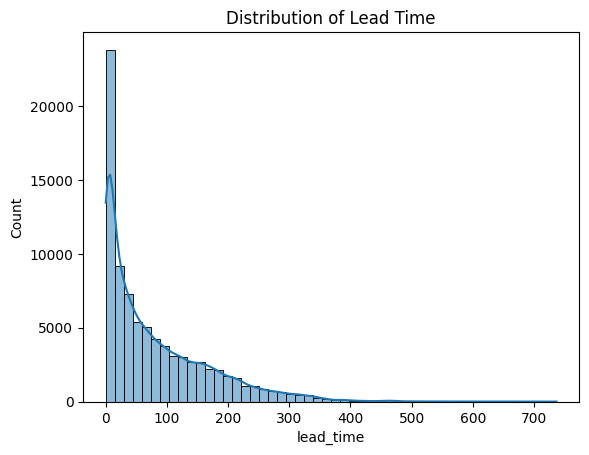

In [53]:
sns.histplot(data=df, x='lead_time', bins=50,kde=True)
plt.title("Distribution of Lead Time")
plt.show()

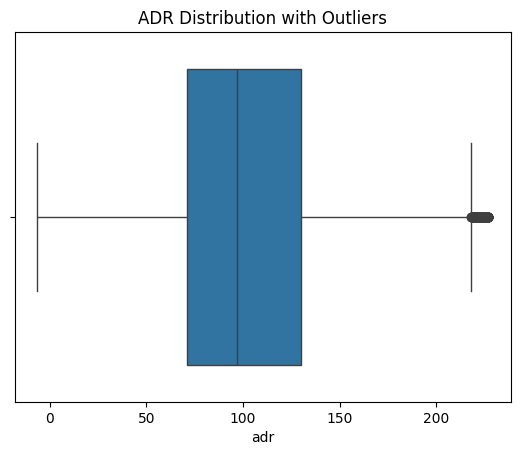

In [54]:
sns.boxplot(x=df['adr'])
plt.title("ADR Distribution with Outliers")
plt.show()

In [55]:
Q3 = df['adr'].quantile(0.75)
Q3

np.float64(130.0)

In [56]:
Q1 = df['adr'].quantile(0.25)
Q1

np.float64(71.23)

In [57]:
df['customer_type'].value_counts()

,count
customer_type,
Transient,69361
Transient-Party,11455
Contract,3132
Group,530


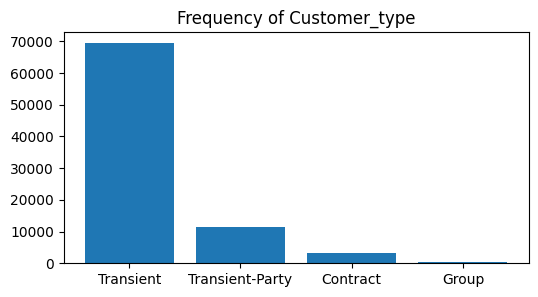

In [58]:
plt.figure(figsize = (6, 3))
plt.title('Frequency of Customer_type')
plt.bar(df['customer_type'].value_counts().index,df['customer_type'].value_counts())
plt.show()

In [59]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,49585
Offline TA/TO,13790
Direct,11109
Groups,4894
Corporate,4184
Complementary,688
Aviation,226
Undefined,2


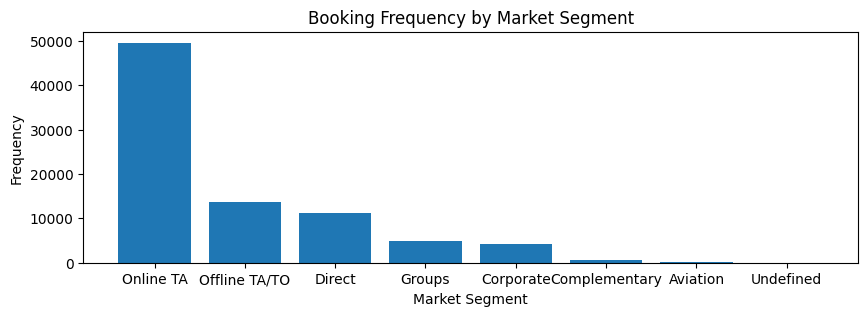

In [60]:
plt.figure(figsize = (10, 3))
plt.xlabel('Market Segment')
plt.ylabel('Frequency')
plt.title('Booking Frequency by Market Segment')
plt.bar(df['market_segment'].value_counts().index,df['market_segment'].value_counts())
plt.show()

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
August,9819
July,9441
May,8209
April,7800
June,7592
March,7443
October,6875
September,6598
February,6045


<BarContainer object of 12 artists>

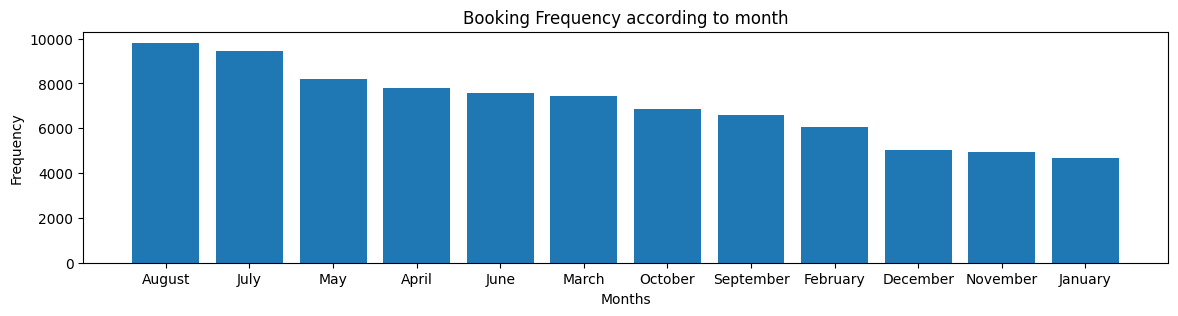

In [63]:
plt.figure(figsize = (14, 3))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Booking Frequency according to month')
plt.bar(df['arrival_date_month'].value_counts().index,df['arrival_date_month'].value_counts())

In [64]:
df.meal.value_counts()

,count
meal,
BB,66146
SC,9388
HB,8193
Undefined,456
FB,295


<BarContainer object of 5 artists>

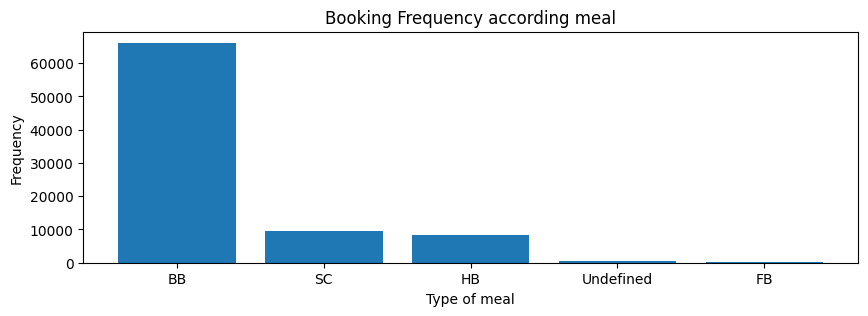

In [65]:
plt.figure(figsize = (10, 3))
plt.xlabel('Type of meal')
plt.ylabel('Frequency')
plt.title('Booking Frequency according meal')
plt.bar(df.meal.value_counts().index,df.meal.value_counts())

In [66]:
#bi variate analysis
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [67]:
grp = df.groupby('hotel')
grp1 = grp['total_stay'].sum()
grp1


,total_stay
hotel,
City Hotel,164262
Resort Hotel,140930


<BarContainer object of 2 artists>

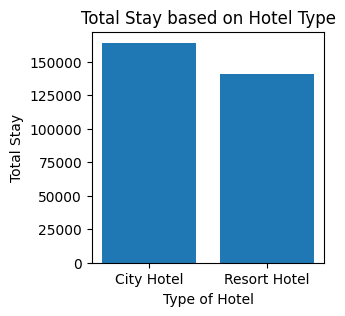

In [68]:
plt.figure(figsize = (3, 3))
plt.xlabel('Type of Hotel')
plt.ylabel('Total Stay')
plt.title('Total Stay based on Hotel Type')
plt.bar(grp1.index,grp1)

<Axes: xlabel='arrival_date_month', ylabel='adr'>

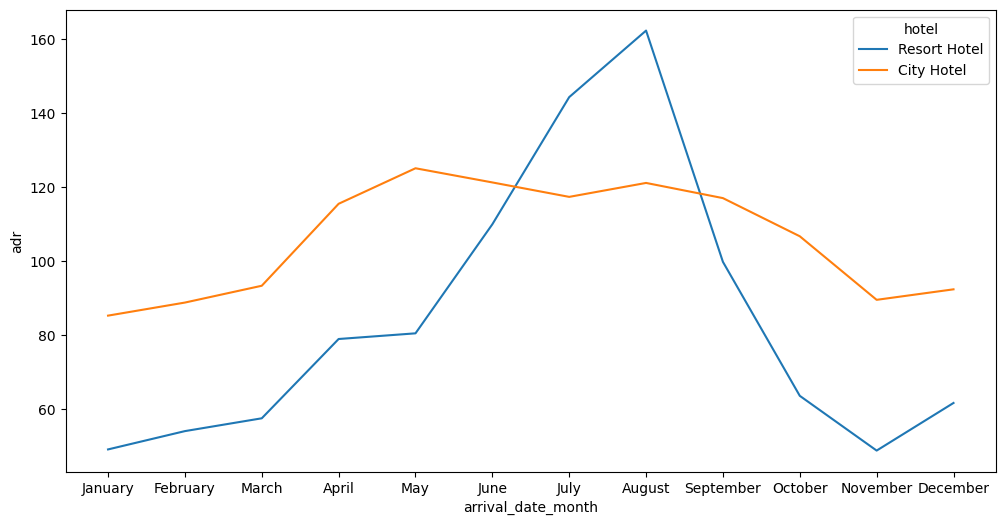

In [69]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x = df['arrival_date_month'], y = df.adr, hue = df.hotel, data = df, errorbar = None)

Text(0, 0.5, 'Average Daily Rate (ADR)')

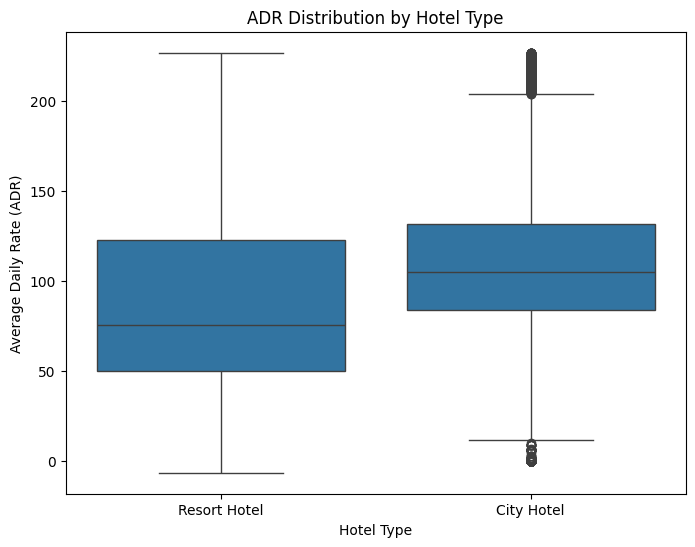

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel', y='adr', data=df)

plt.title('ADR Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')

In [71]:
q1_q3 = df.groupby('hotel')['adr'].quantile([0.25, 0.75]).unstack()
q1_q3.columns = ['Q1', 'Q3']
print(q1_q3)


                Q1     Q3
hotel                    
City Hotel    83.9  132.0
Resort Hotel  50.0  123.0


In [96]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


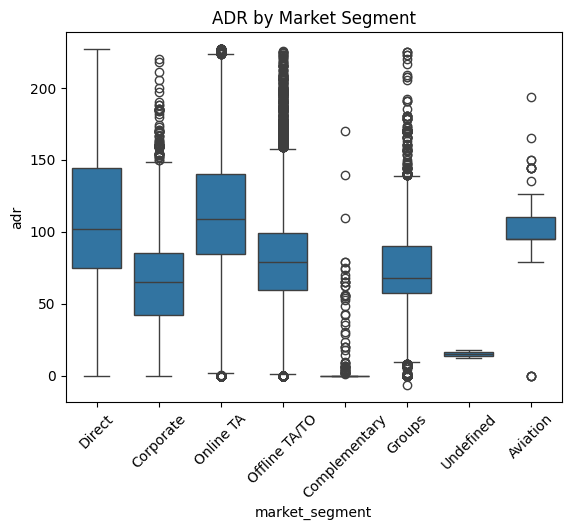

In [98]:
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title("ADR by Market Segment")
plt.xticks(rotation=45)
plt.show()


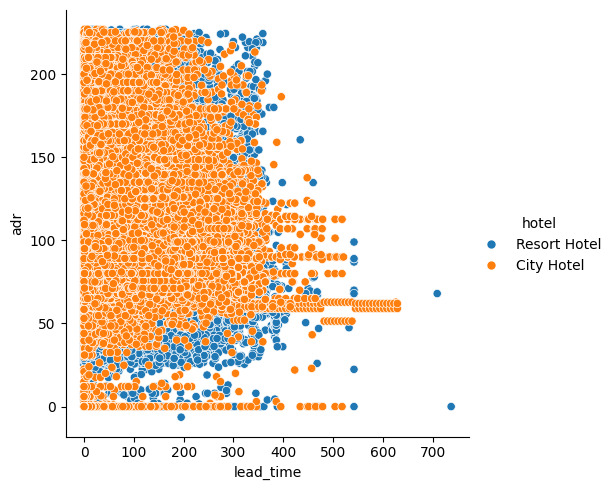

In [100]:
sns.relplot(x = df['lead_time'], y = df['adr'], hue = df['hotel'])

In [110]:
# Step 1: get top 10 countries
top_10_countries = df['country'].value_counts().head(10).index

# Step 2: filter df for only these top countries
df_top10 = df[df['country'].isin(top_10_countries)]

df_new = df_top10.pivot_table(values='adr', index='hotel', columns='country', aggfunc='mean')

df_new


country,BEL,BRA,DEU,ESP,FRA,GBR,IRL,ITA,NLD,PRT
hotel,,,,,,,,,,
City Hotel,118.609620,111.766523,109.432661,117.476217,112.980033,114.485303,115.067192,115.635221,115.212559,92.970843
Resort Hotel,88.811973,103.847953,80.725579,107.365024,90.983706,79.967885,89.779230,95.056878,81.437238,87.457974


<Figure size 600x10000 with 0 Axes>

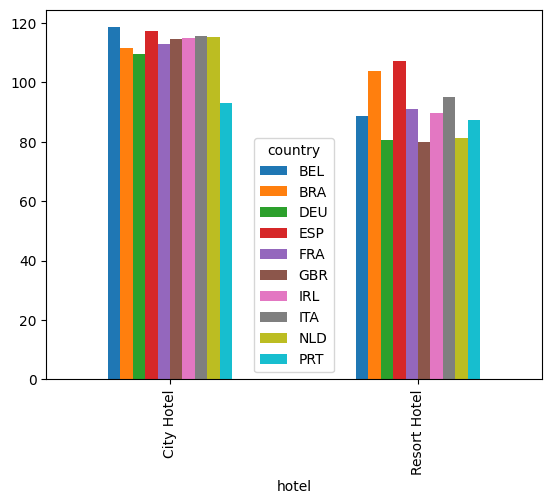

In [116]:

plt.figure(figsize = (6, 100))
df_new.plot(kind = 'bar')
plt.show()

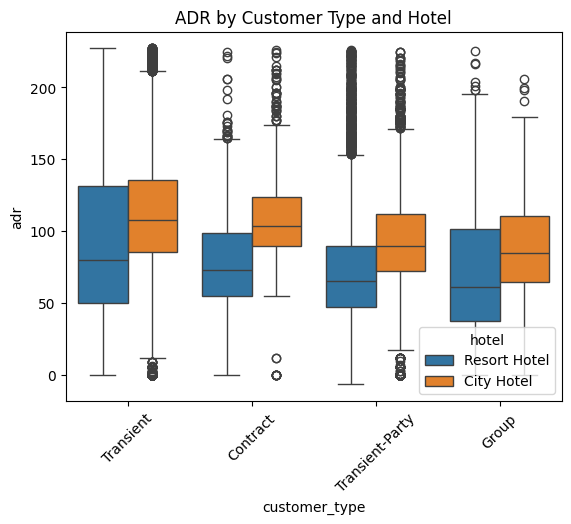

In [117]:
sns.boxplot(data=df, x='customer_type', y='adr', hue='hotel')
plt.title("ADR by Customer Type and Hotel")
plt.xticks(rotation=45)
plt.show()


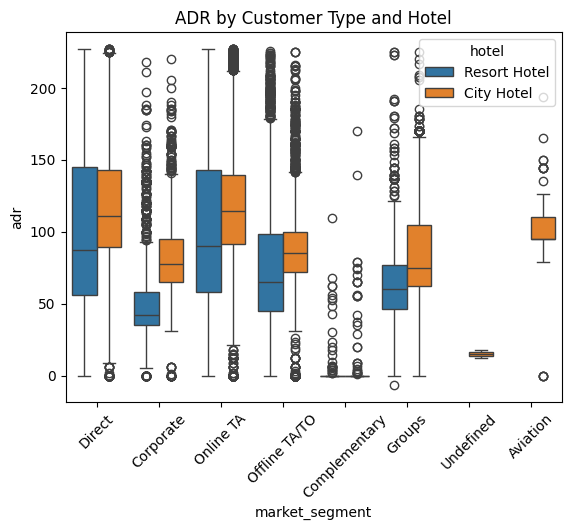

In [121]:
sns.boxplot(data=df, x='market_segment', y='adr', hue='hotel')
plt.title("ADR by Customer Type and Hotel")
plt.xticks(rotation=45)
plt.show()

In [126]:
means = df.groupby('market_segment')['adr'].mean()
means


,adr
market_segment,
Aviation,100.613628
Complementary,3.102573
Corporate,68.152498
Direct,108.584190
Groups,74.026563
Offline TA/TO,80.924430
Online TA,113.427773
Undefined,15.000000


In [128]:
df1 = df[(df['market_segment'] == 'Online TA') | (df['market_segment'] == 'Direct')]
df1

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,City Hotel,0,135,2017-08-30,2017,August,35,30,2,4,6,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,209.00,0,0,Check-Out,2017-09-05
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,7,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,7,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,7,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [138]:
Samp1_OnlineTA = df[(df['market_segment'] == 'Online TA')]['adr']

In [131]:
df1

pandas.core.series.Series

In [134]:
Samp2_Direct = df[(df['market_segment'] == 'Direct')]['adr']
Samp2_Direct

,adr
0,0.00
1,0.00
2,75.00
6,107.00
7,103.00
...,...
119356,135.00
119358,143.10
119368,99.00
119369,96.25


In [139]:
Samp1_OnlineTA.mean() - Samp2_Direct.mean()

np.float64(4.843582215692081)

In [141]:
saw.ztest(Samp1_OnlineTA, Samp2_Direct, value = 0)

(np.float64(10.548192479344028), np.float64(5.178369175217843e-26))

In [144]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [163]:

df['lead_time_category'] = pd.cut(df['lead_time'],
                                  bins=[-1, 30, 90, df['lead_time'].max()],
                                  labels=['Short', 'Medium', 'Long'])



In [164]:
df['lead_time_category']

,lead_time_category
0,Long
1,Long
2,Short
3,Short
4,Short
...,...
119385,Short
119386,Long
119387,Medium
119388,Long


In [165]:
df['room_upgrade'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)


In [166]:
contingency = pd.crosstab(df['room_upgrade'], df['lead_time_category'])
print(contingency)


lead_time_category  Short  Medium   Long
room_upgrade                            
0                   26430   19117  26119
1                    7078    2772   2962


In [167]:
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(1591.5089947498143), pvalue=np.float64(0.0), dof=2, expected_freq=array([[28426.150335  , 18569.29702408, 24670.55264092],
       [ 5081.849665  ,  3319.70297592,  4410.44735908]]))

In [168]:
df1 = df[df['customer_type'] == 'Transient']['total_stay']

In [170]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [171]:
df2 = df[df['customer_type'] == 'Contract']['total_stay']

In [172]:
df3 = df[df['customer_type'] == 'Transient-Party']['total_stay']

In [173]:
df4 = df[df['customer_type'] == 'Group']['total_stay']

In [178]:
df1_labeled = pd.DataFrame({'total_stay': df[df['customer_type'] == 'Transient']['total_stay'],
                            'customer_type': 'Transient'})

df2_labeled = pd.DataFrame({'total_stay': df[df['customer_type'] == 'Contract']['total_stay'],
                            'customer_type': 'Contract'})

df3_labeled = pd.DataFrame({'total_stay': df[df['customer_type'] == 'Transient-Party']['total_stay'],
                            'customer_type': 'Transient-Party'})

df4_labeled = pd.DataFrame({'total_stay': df[df['customer_type'] == 'Group']['total_stay'],
                            'customer_type': 'Group'})

anova_df = pd.concat([df1_labeled, df2_labeled, df3_labeled, df4_labeled], ignore_index=True)


anova_df.head()


,total_stay,customer_type
0,0,Transient
1,0,Transient
2,1,Transient
3,1,Transient
4,2,Transient


In [180]:
from  statsmodels.formula.api import ols


mod1 = ols('total_stay ~ customer_type', data=anova_df).fit()

In [182]:
import  statsmodels.api as sm

tbl = sm.stats.anova_lm(mod1)
tbl

,df,sum_sq,mean_sq,F,PR(>F)
customer_type,3.0,19925.813573,6641.937858,907.254992,0.0
Residual,84474.0,618427.083371,7.320916,NaN,NaN


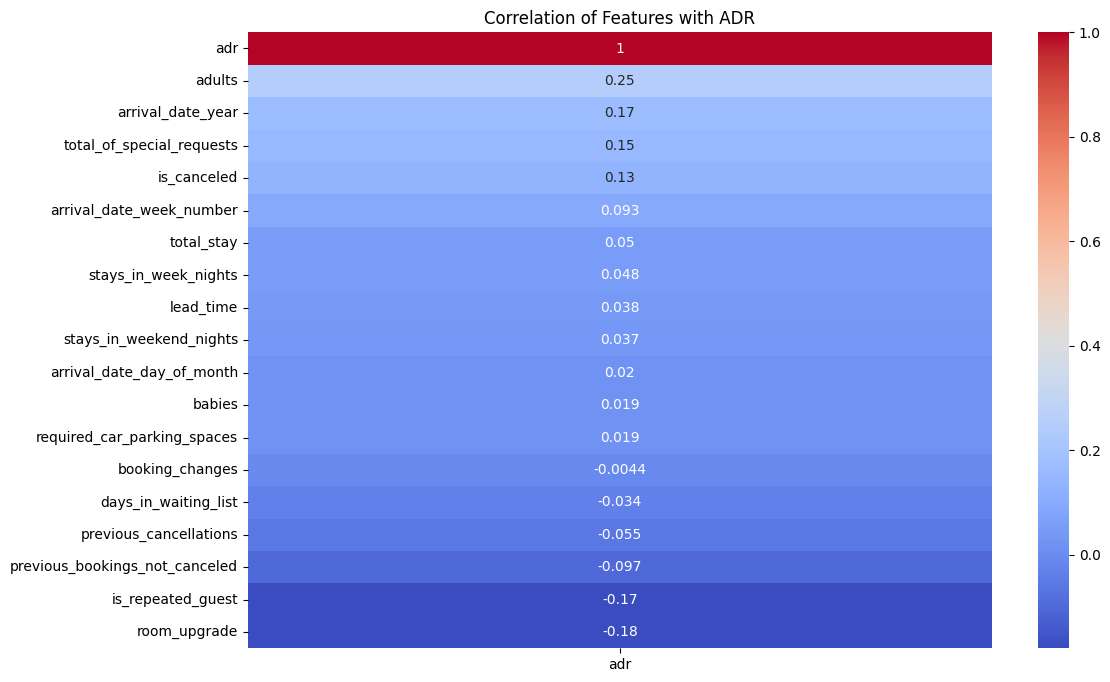

In [184]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with ADR")
plt.show()

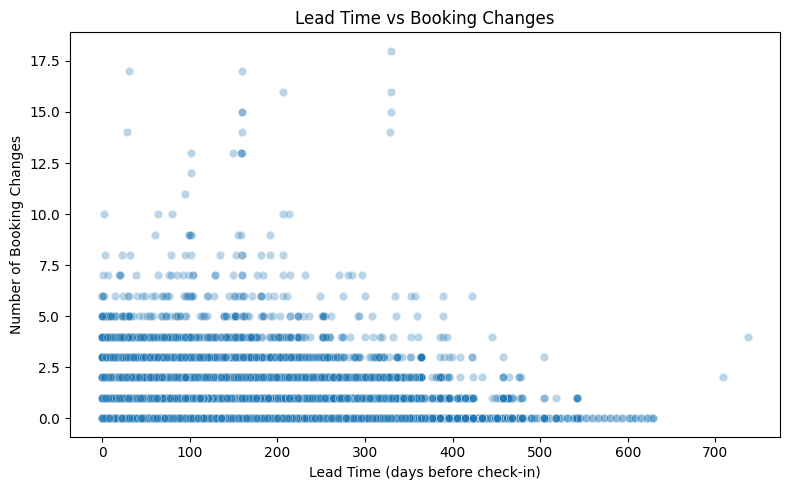

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='lead_time', y='booking_changes', alpha=0.3)
plt.title("Lead Time vs Booking Changes")
plt.xlabel("Lead Time (days before check-in)")
plt.ylabel("Number of Booking Changes")
plt.tight_layout()
plt.show()


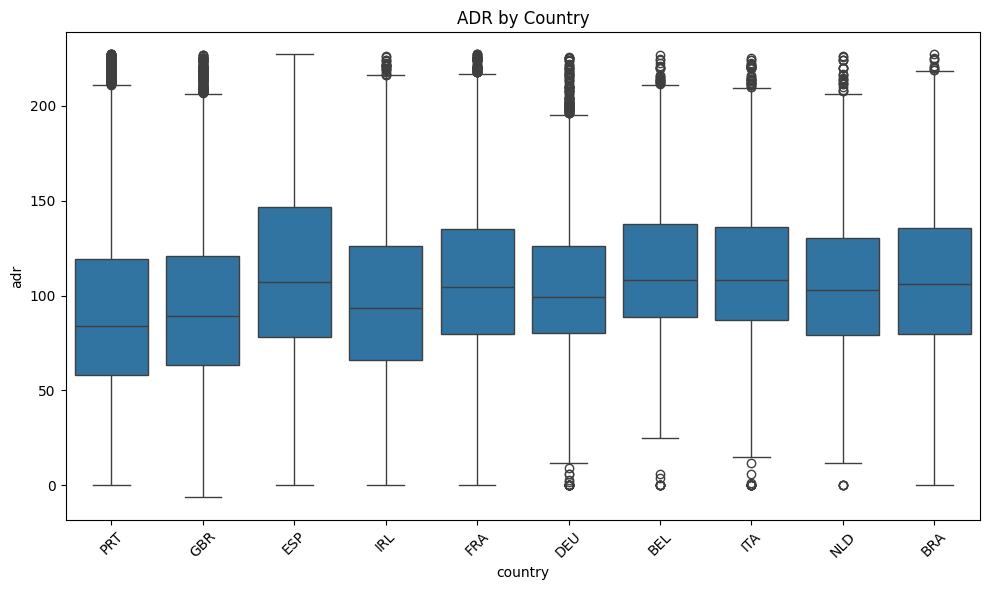

In [204]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
top_countries = df['country'].value_counts().head(10).index
df_top = df[df['country'].isin(top_countries)]


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top, x='country', y='adr')
plt.xticks(rotation=45)
plt.title("ADR by Country")
plt.tight_layout()
plt.show()


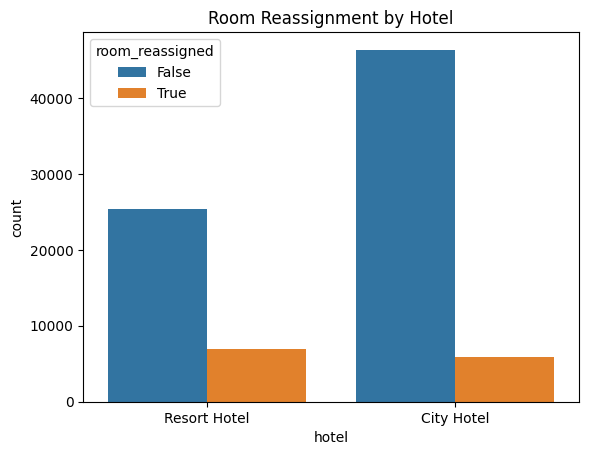

In [205]:
df['room_reassigned'] = df['reserved_room_type'] != df['assigned_room_type']
df['room_reassigned'].value_counts(normalize=True) * 100
sns.countplot(data=df, x='hotel', hue='room_reassigned')
plt.title("Room Reassignment by Hotel")
plt.show()


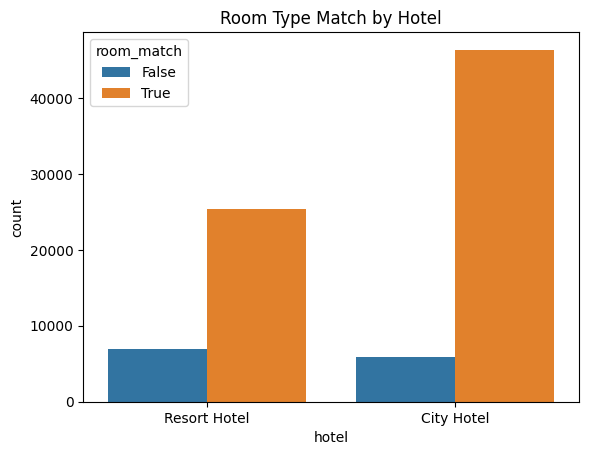

In [189]:
df['room_match'] = df['reserved_room_type'] == df['assigned_room_type']
match_rate = df['room_match'].value_counts(normalize=True) * 100
sns.countplot(data=df, x='hotel', hue='room_match')
plt.title("Room Type Match by Hotel")
plt.show()


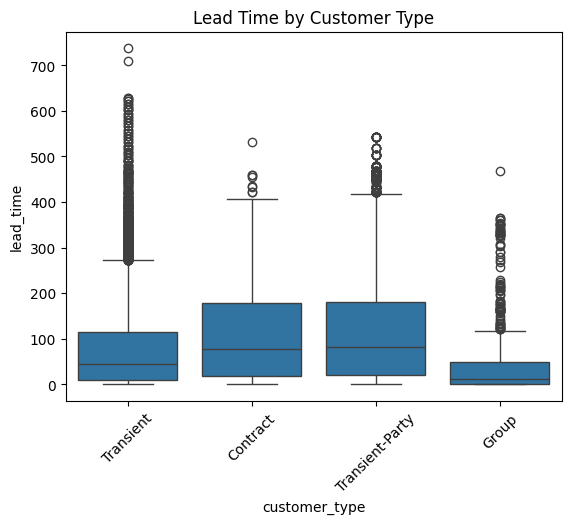

In [193]:
sns.boxplot(data=df, x='customer_type', y='lead_time')
plt.title("Lead Time by Customer Type")
plt.xticks(rotation=45)
plt.show()

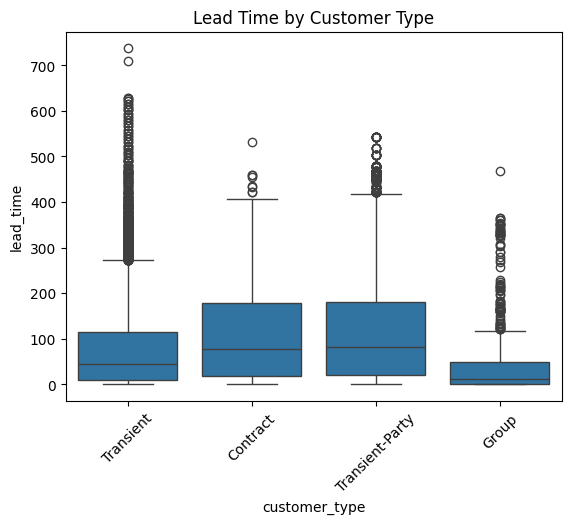

In [194]:
sns.boxplot(data=df, x='customer_type', y='lead_time')
plt.title("Lead Time by Customer Type")
plt.xticks(rotation=45)
plt.show()

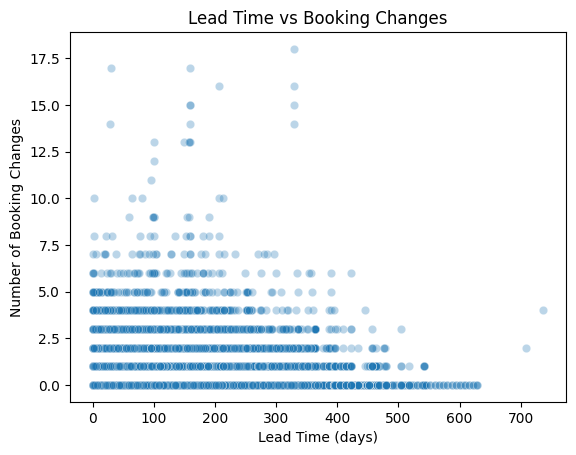

In [195]:
sns.scatterplot(data=df, x='lead_time', y='booking_changes', alpha=0.3)
plt.title("Lead Time vs Booking Changes")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Booking Changes")
plt.show()

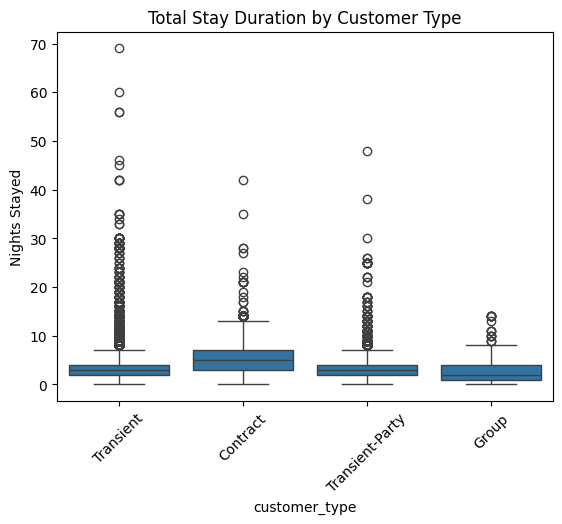

In [196]:
sns.boxplot(data=df, x='customer_type', y='total_stay')
plt.title("Total Stay Duration by Customer Type")
plt.ylabel("Nights Stayed")
plt.xticks(rotation=45)
plt.show()

room_upgraded
False    71666
True     12812
Name: count, dtype: int64
Percentage of bookings with room upgrade or reassignment: 15.17%


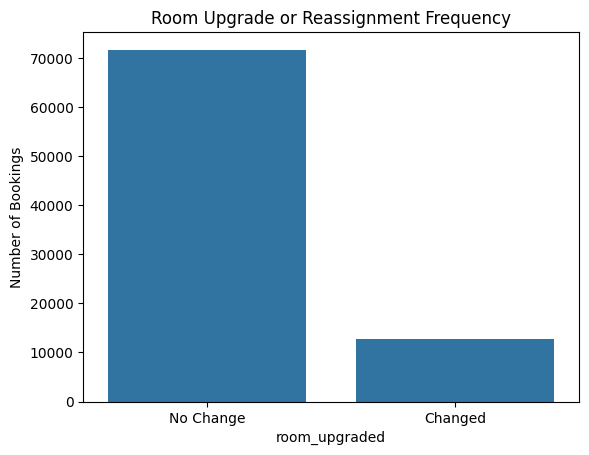

In [197]:
df['room_upgraded'] = df['reserved_room_type'] != df['assigned_room_type']
upgrade_counts = df['room_upgraded'].value_counts()
print(upgrade_counts)

# Percentage
percent_upgraded = df['room_upgraded'].mean() * 100
print(f"Percentage of bookings with room upgrade or reassignment: {percent_upgraded:.2f}%")
sns.countplot(data=df, x='room_upgraded')
plt.title("Room Upgrade or Reassignment Frequency")
plt.xticks([0, 1], ['No Change', 'Changed'])
plt.ylabel("Number of Bookings")
plt.show()

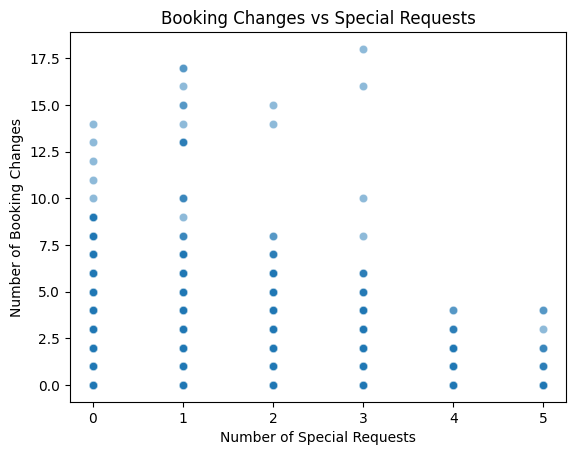

In [198]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
sns.scatterplot(data=df, x='total_of_special_requests', y='booking_changes', alpha=0.5)
plt.title("Booking Changes vs Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Booking Changes")
plt.show()

In [199]:
# Average booking changes by market segment
chg_by_segment = df.groupby('market_segment')['booking_changes'].mean().sort_values()

# Cancellation rate by market segment
cancel_by_segment = df.groupby('market_segment')['is_canceled'].mean().sort_values()

# Combine in one DataFrame
consistency_df = pd.DataFrame({
    'Avg_Booking_Changes': chg_by_segment,
    'Cancellation_Rate': cancel_by_segment
})

print(consistency_df)

                Avg_Booking_Changes  Cancellation_Rate
market_segment                                        
Aviation                   0.252212           0.199115
Complementary              0.334302           0.122093
Corporate                  0.348709           0.121176
Direct                     0.394365           0.144027
Groups                     0.633837           0.271148
Offline TA/TO              0.225816           0.148078
Online TA                  0.203267           0.349924
Undefined                  0.000000           1.000000


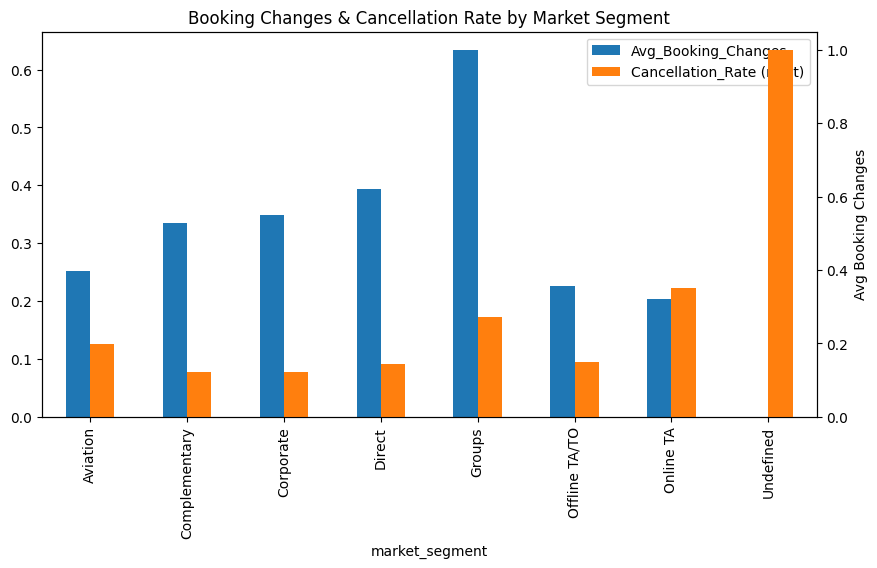

In [201]:
consistency_df.plot(kind='bar', figsize=(10,5), secondary_y='Cancellation_Rate')
plt.title("Booking Changes & Cancellation Rate by Market Segment")
plt.ylabel("Avg Booking Changes")
plt.show()

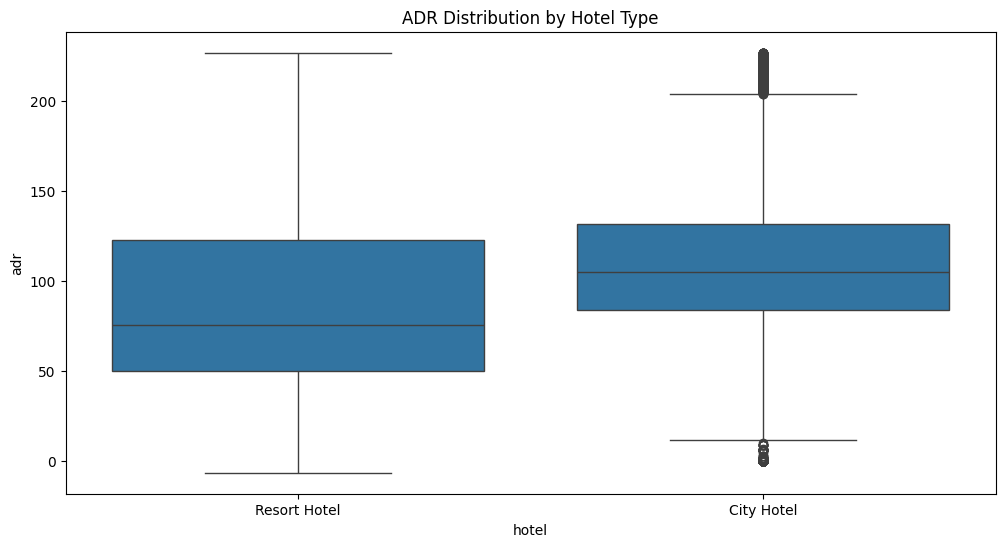

In [203]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='hotel', y='adr')
plt.title('ADR Distribution by Hotel Type')
plt.show()